# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [81]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [82]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [84]:
spaceship = spaceship.dropna()
spaceship['Cabin'] = spaceship['Cabin'].apply(lambda x: x[0] if x[0] in ['A', 'B', 'C', 'D', 'E', 'F'] else 'T')
spaceship = spaceship.drop(columns = ['PassengerId', 'Name'])
cat_vars = list(spaceship.select_dtypes('object'))
spaceship = pd.get_dummies(spaceship, columns=cat_vars)

**Perform Train Test Split**

In [86]:
target = spaceship[['Transported']]
features = spaceship.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [87]:
# normalization
scaler = StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

In [89]:
# Logistic Regression
model = LogisticRegression()
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7806354009077155
Confusion Matrix:
 [[428 225]
 [ 65 604]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.66      0.75       653
        True       0.73      0.90      0.81       669

    accuracy                           0.78      1322
   macro avg       0.80      0.78      0.78      1322
weighted avg       0.80      0.78      0.78      1322



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
# Decision Tree
#tree = DecisionTreeClassifier(max_depth=3)
#tree = DecisionTreeClassifier(max_depth=20)
tree = DecisionTreeClassifier(max_depth=8)

tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy.round(3))
f1 = f1_score(y_test, pred, average='weighted')
print("F1 Score:", f1.round(3))

Confusion Matrix:
 [[469 184]
 [105 564]]
Accuracy: 0.781
F1 Score: 0.78


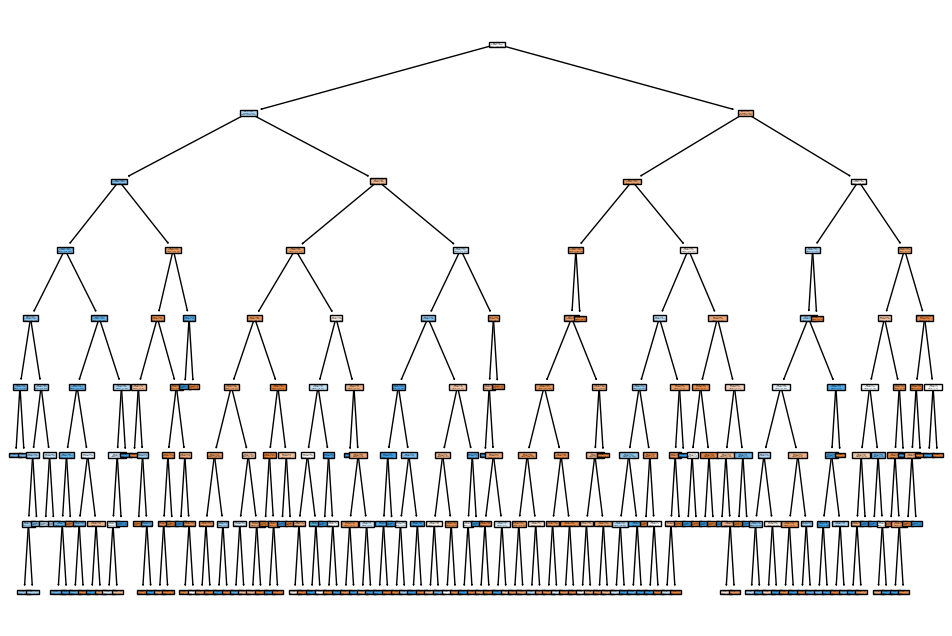

In [148]:
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=X_train.columns, filled=True)

plt.show()

## IGNORE

- Bagging and Pasting

In [94]:
#your code here

- Random Forests

In [96]:
#your code here

- Gradient Boosting

In [98]:
#your code here

- Adaptive Boosting

In [100]:
#your code here

Which model is the best and why?

In [102]:
#comment here